### Remembering Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
# Generate some random data
np.random.seed(0)
N = int(1e6)
X = np.random.rand(N, 1)
y = 4 + 3 * X + 0.1*np.random.randn(N, 1)

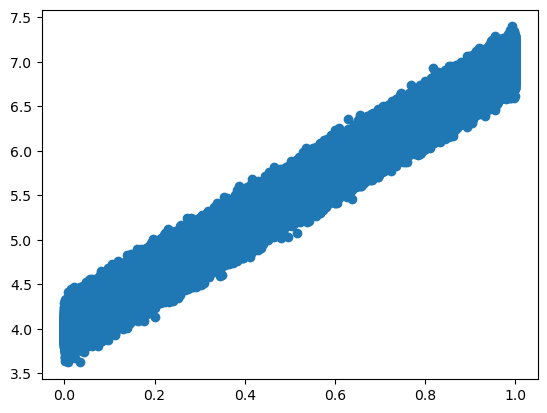

In [31]:
plt.scatter(X, y)

In [20]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

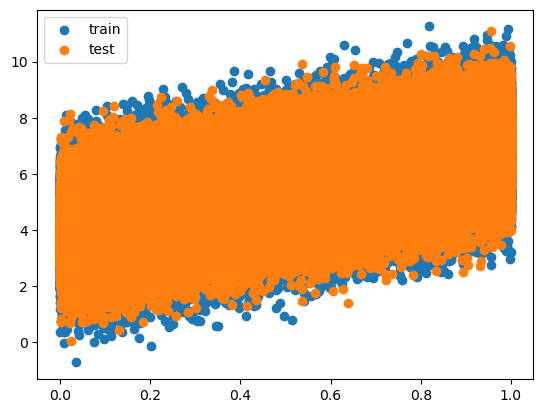

In [21]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.legend()

In [22]:
# Fitting a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predictions and error
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(lin_reg.intercept_, lin_reg.coef_)
mse

[3.99800374] [[3.0027362]]


0.9978083182871054

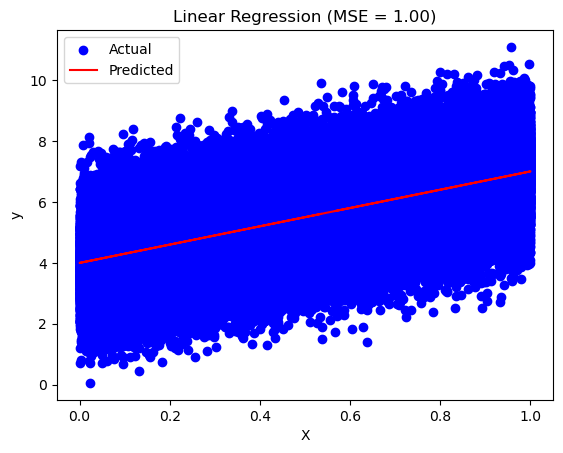

In [24]:
# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title(f'Linear Regression (MSE = {mse:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Linear Classifier

In [37]:
# Generating binary class labels based on a threshold
y_class = (y > 6).astype(int)  # Class 1 if y > 7, otherwise Class 0

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

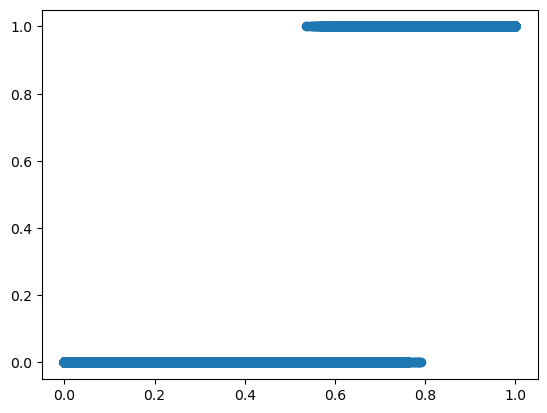

In [38]:
plt.scatter(X_train, y_train)

In [36]:
# Fitting the linear regression model again (it will be used as a linear classifier)
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.02464562] [[0.07551156]]


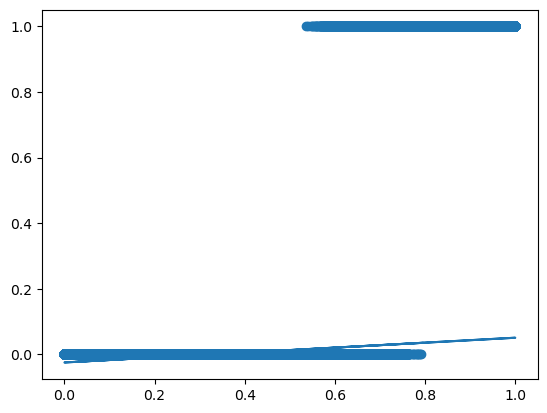

In [39]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lin_reg.predict(X_train))

In [42]:
lin_reg.predict(np.array([0.8]).reshape(1,1))

array([[0.03576364]])

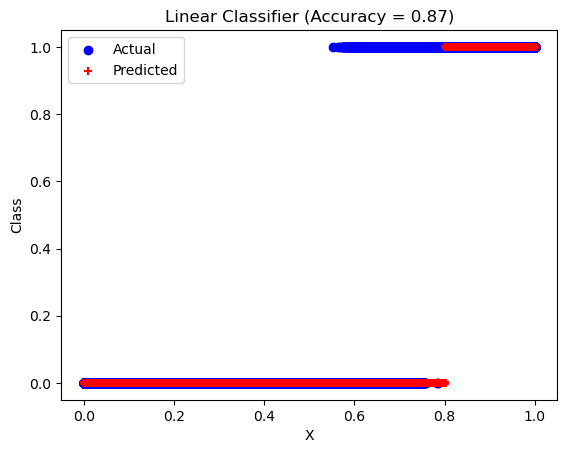

In [43]:
# Predictions for classification (using threshold 0.5)
y_pred = (lin_reg.predict(X_test) > 0.03576364).astype(int)

# Accuracy calculation
accuracy = np.mean(y_pred == y_test)

# Plotting the decision boundary
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='+')
plt.title(f'Linear Classifier (Accuracy = {accuracy:.2f})')
plt.xlabel('X')
plt.ylabel('Class')
plt.legend()
plt.show()

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
# Fitting a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

/usr/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


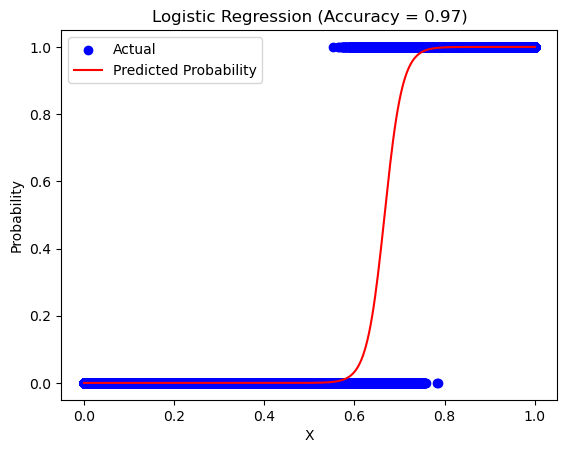

In [46]:
# Plotting the decision boundary with logistic regression
X_range = np.linspace(min(X_test), max(X_test), 300).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_range)[:, 1]

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_range, y_proba, color='red', label='Predicted Probability')
plt.title(f'Logistic Regression (Accuracy = {accuracy:.2f})')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.show()

### Architectures

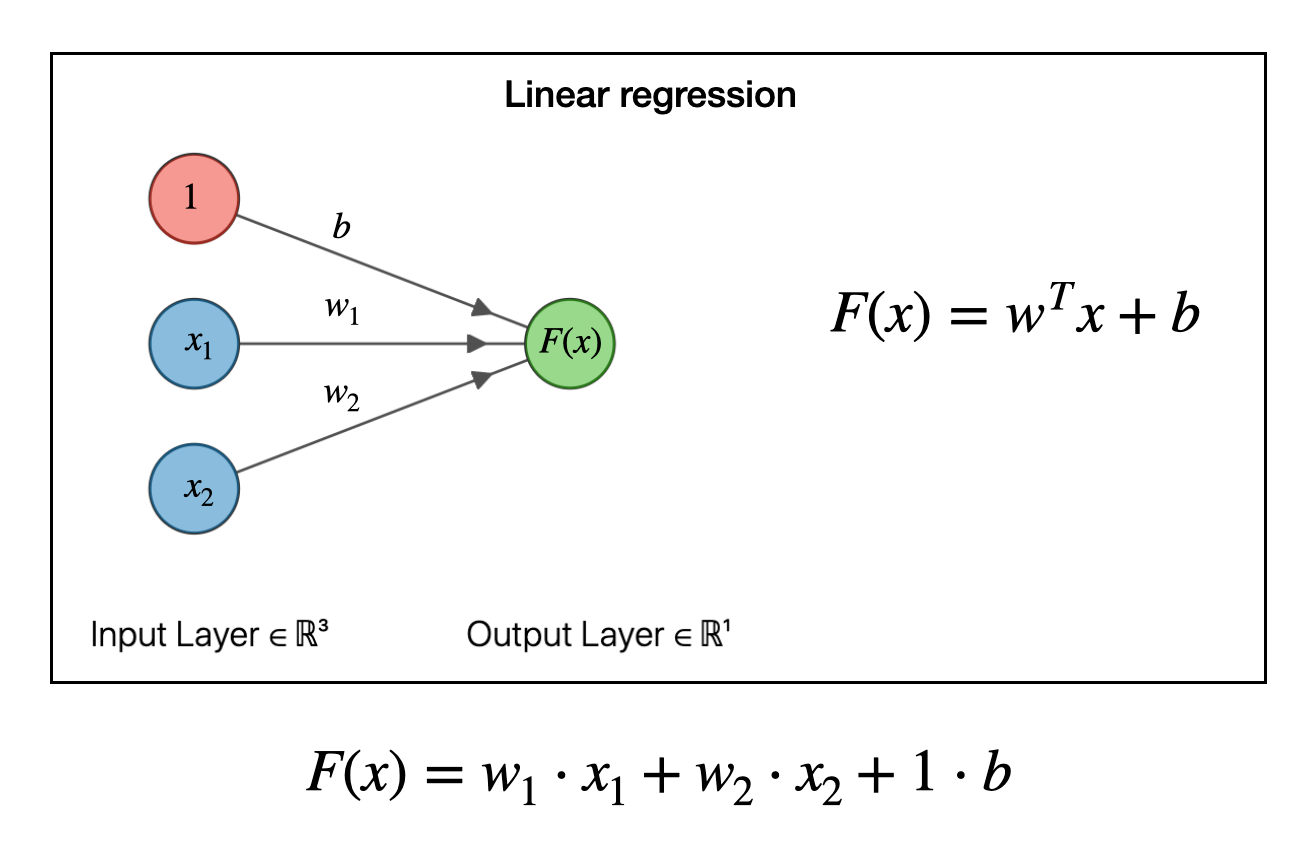

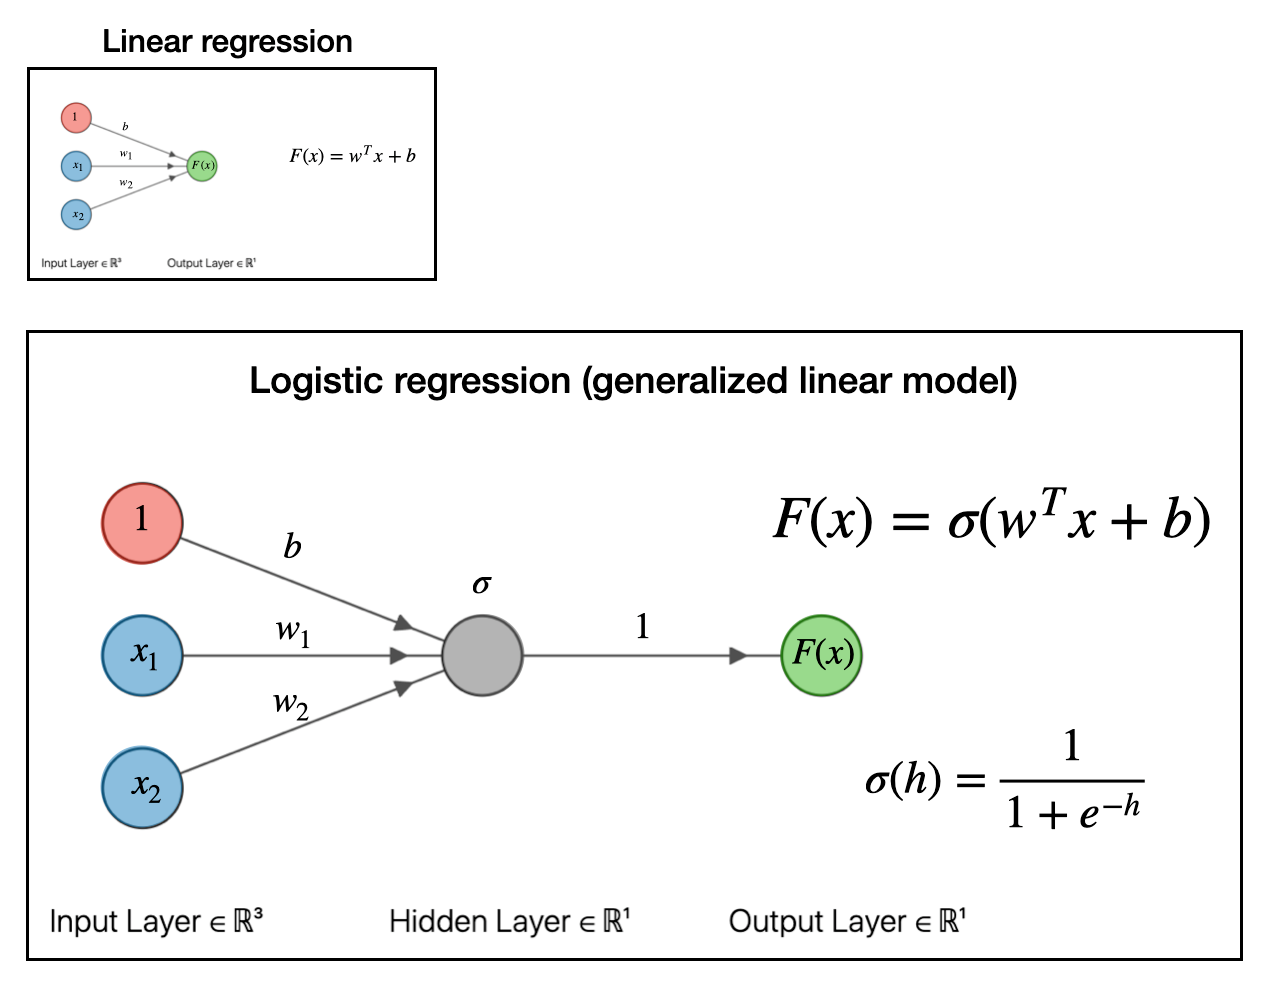

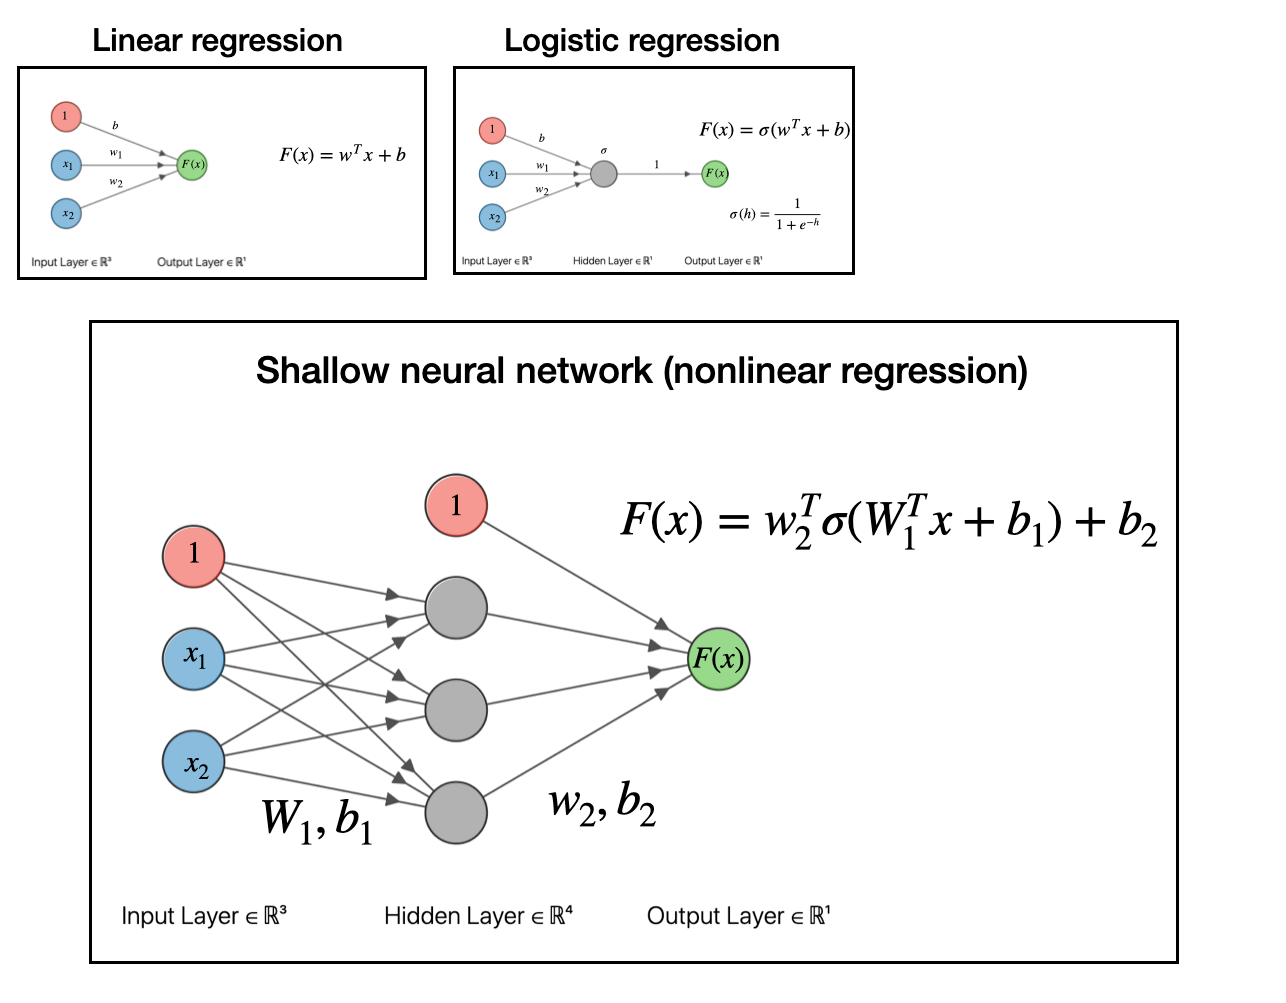

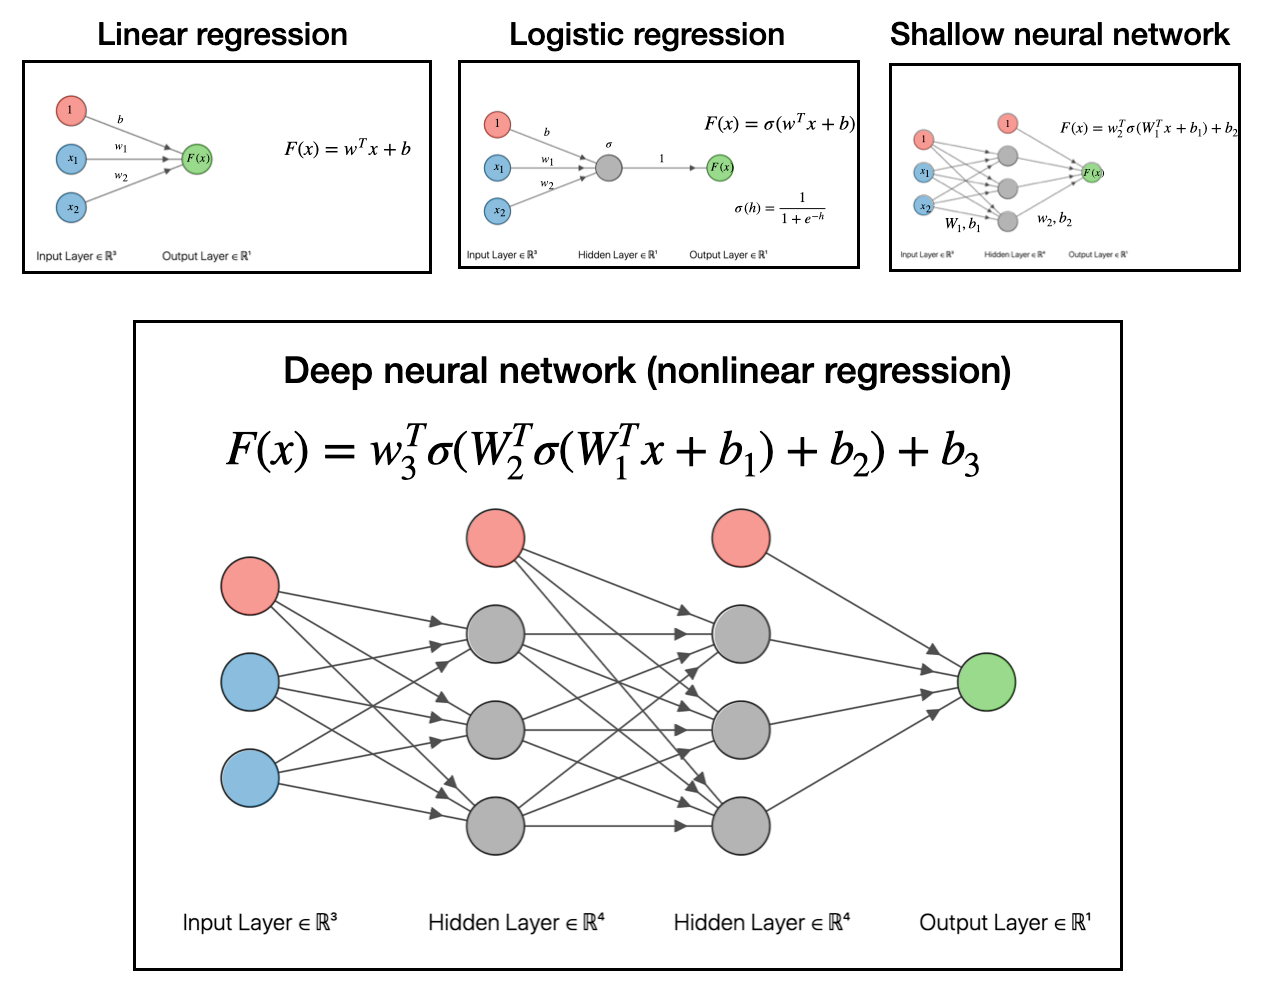

## Neurons

In [47]:
# Basic Neuron Implementation
class SimpleNeuron:
    def __init__(self):
        self.weights = np.random.randn()
        self.bias = np.random.randn()
    
    def activation(self, x):
        """Simple step activation function"""
        return 1 if x > 0 else 0
    
    def forward(self, x):
        """Forward pass through the neuron"""
        return self.activation(self.weights * x + self.bias)

In [48]:
neuron = SimpleNeuron()
print("Single neuron output:", neuron.forward(1.0))

Single neuron output: 0


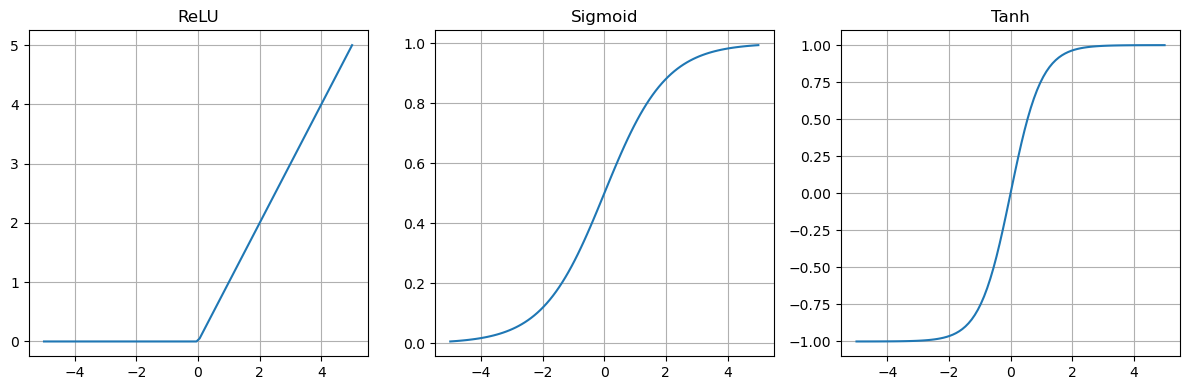

In [49]:
def plot_activation_functions():
    """Visualize common activation functions"""
    x = np.linspace(-5, 5, 100)
    
    # ReLU
    relu = np.maximum(0, x)
    
    # Sigmoid
    sigmoid = 1 / (1 + np.exp(-x))
    
    # Tanh
    tanh = np.tanh(x)
    
    plt.figure(figsize=(12, 4))
    plt.subplot(131)
    plt.plot(x, relu)
    plt.title('ReLU')
    plt.grid(True)
    
    plt.subplot(132)
    plt.plot(x, sigmoid)
    plt.title('Sigmoid')
    plt.grid(True)
    
    plt.subplot(133)
    plt.plot(x, tanh)
    plt.title('Tanh')
    plt.grid(True)
    
    plt.tight_layout()

# Visualize activation functions
plot_activation_functions()

In [50]:
# Basic Neural Network Implementation
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def forward(self, x):
        """Forward pass through the network"""
        # First layer
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.relu(self.z2)
        
        return self.a2

# Example usage
simple_nn = SimpleNeuralNetwork(2, 3, 1)
sample_input = np.array([1.0, 2.0])
print("Simple NN output:", simple_nn.forward(sample_input))

Simple NN output: [0.46002147]


### Tensorflow
But planning these architectures barehand is a hard work. Luckily, there is a dedicated library to do this, called `tensorflow`. Let us see the following example to classify written numbers:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[1], cmap='gray')

In [ ]:
# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the images from 28x28 to 784
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

In [ ]:
# Build the neural network model
mnist_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
mnist_model.fit(X_train_flat, y_train, epochs=5, batch_size=32)

In [ ]:
# Evaluate the model
test_loss, test_acc = mnist_model.evaluate(X_test_flat, y_test)

print(f'Test accuracy: {test_acc}')

In [ ]:
# Visualizing a sample image
test = 8
plt.imshow(X_test[test], cmap='gray')
plt.title(f'Predicted Label: {np.argmax(mnist_model.predict(X_test[test].reshape(-1, 28*28)))}')
plt.show()

### Breast Cancer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
test_labels

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

- Define a CNN with at least 2 convolutional layers followed by max pooling, and a couple of dense layers at the end. For that, the layers are defined in `models.Sequetial` as
```python
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
layers.MaxPooling2D((2, 2))
```
- Compile the model.
- Train the model.
- Evaluate the model performance.

In [ ]:
images = models.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    # Third Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout to prevent overfitting
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
images.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
images.fit(train_images, train_labels, epochs=15, batch_size=50)

In [ ]:
images.evaluate(test_images, test_labels)

In [ ]:
image = train_images[3]  # Get first image and normalize it

# Create a model that outputs the first conv layer
image_batch = image[None, ...]  # Same as image.reshape(1, 32, 32, 3)

# Create intermediate model more explicitly
conv_layer = images.layers[0]  # Get first conv layer
activations = conv_layer(image_batch)  # Get its output
activations.shape

In [ ]:
# Plot original image and the activation
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Activation map of first filter
plt.subplot(1, 2, 2)
plt.imshow(activations[0, :, :, 8], cmap='viridis')
plt.title('First Neuron Activation')
plt.axis('off')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
y_pred = images.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

In [ ]:
cm = confusion_matrix(test_labels, y_pred_classes)
# Create figure and plot
plt.figure(figsize=(12, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# Print per-class accuracy
print("\nPer-class accuracy:")
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
for class_name, accuracy in zip(class_names, per_class_accuracy):
    print(f"{class_name}: {accuracy:.2%}")